<a href="https://colab.research.google.com/github/JiaminJIAN/20MA573/blob/master/src/Finite_difference_method_on_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Finite difference method on ODE**

## **Exercise:**

Consider ODE

\begin{equation}
    - \epsilon u^{''} + u = x, \, \forall x \in (0, 1) \, u(0) = u(1) = 0,
\end{equation}

with $\epsilon = 10^{-10}$. This example is taken from Example $5.2$ of

- Qingshuo Song, George Yin, Zhimin Zhang, An epsilon-uniform finite element method for singularly perturbed boundary value problems.

Instead of FEM, we are going to discuss CFD solution of the above ODE. Answer the following questions:

(i) Prove that
\begin{equation*}
    u(x) = x - \frac{\exp (\frac{x-1}{\sqrt{\epsilon}}) - \exp (- \frac{x+1}{\sqrt{\epsilon}})}{1 - \exp(- \frac{2}{\sqrt{\epsilon}})}
\end{equation*}
is the unique solution.

(ii) Using CFD on above ODE, find out the matrix $L^{h}$ and vector $R^{h}f$, such that the numerical solution satisfies $L^{h}u^{h} = R^{h}f$.

(iii) Prove the consistency and stability of $L^{h}$.

(iv) Compute CFD solution $u^{h}$ with $h = \frac{1}{5}$. Compare with the FEM solution of the paper, which one is better?


## **Solution:**


For the question (iv):

When $ h = \frac{1}{5}$ and $\epsilon = 10^{-10}$, we can get the exact value of $s = 1 + 50 \times 10^{-10}$ and $r = 25 \times 10^{-10}$. And we have $R^{h} f = (0, \frac{1}{5}, \frac{2}{5}, \frac{3}{5}, \frac{4}{5}, 0)$ and 

$$ A = 
 \begin{bmatrix}
 1  &  0  &  0  &  0  &  0  & 0  \\
 -r &  s  & -r  &  0  &  0  & 0  \\
 0  & -r  & s   &  -r &  0  & 0  \\
 0  &  0  & -r  &  s  & -r  & 0   \\
 0  &  0  & 0   & -r  &  s  & -r  \\
 0  &  0  & 0   &  0  &  0  &  1 
\end{bmatrix}
$$

Then by the $L^{h} u^{h} = R^{h}f$, we can get the numerical solution of the above ODE.

In [1]:
# Get the exact value of s and r

e = 10**(-10)
s = 1 + 50 * e
r = 25 * e

print("the value of e is", e)
print("the value of s is", s)
print("the value of r is", r)

the value of e is 1e-10
the value of s is 1.000000005
the value of r is 2.5e-09


In [2]:
import numpy as np
from scipy.linalg import solve

a = np.array([[1, 0, 0 ,0, 0, 0], [-r, s, -r ,0, 0, 0],\
              [0, -r, s, -r, 0, 0], [0, 0, -r, s, -r, 0],\
              [0, 0, 0, -r, s, -r], [0, 0, 0 ,0, 0, 1]])
b = np.array([0, 1/5, 2/5, 3/5, 4/5, 0])
numerical_solution = solve(a, b)
print(numerical_solution)

[0.  0.2 0.4 0.6 0.8 0. ]


In [3]:
# Get the exact value of the ODE

def exact_value(x, e):
  u = x - (np.exp((x - 1)/np.sqrt(e)) - np.exp(- (x+1)/np.sqrt(e))) / (1 - np.exp(- 2 / np.sqrt(e)))
  return u

exact_value_list = []
e = 10**(-10)
exact_value_list = [exact_value(i/5, e) for i in range(6)]
print(exact_value_list)




[0.0, 0.2, 0.4, 0.6, 0.8, 0.0]


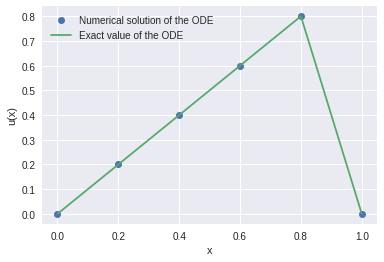

In [9]:
# Plot the exact value with the numerical solution of the ODE

import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

x = np.array([0, 1/5, 2/5, 3/5, 4/5, 1])
plt.plot(x, numerical_solution, 'o', label='Numerical solution of the ODE')
plt.plot(x, exact_value_list, label = 'Exact value of the ODE')

plt.ylabel('u(x)')
plt.xlabel('x')
plt.legend();